In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("../data/broadband_training_2.csv")
data = data.set_index('tract_geoid')
data = data.loc[:,data.dtypes =='float64']
data=data.dropna(how='any', axis = 1)
data.head()

,MaxAdDown,MaxAdUp,Wired_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,...,pct_pop_60_to_64,pct_pop_65_to_69,pct_pop_70_to_74,pct_pop_75_to_79,pct_pop_80_to_84,pct_pop_gt_85,pct_pop_disability,pct_pop_households_with_kids,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps)
tract_geoid,,,,,,,,,,,,,,,,,,,,,
24031700607,987.0,880.0,3.0,0.0,4.0,2.0,0.0,2.0,2.0,0.0,...,7.475754,6.384698,3.852371,2.693966,0.431034,0.080819,3.811961,1.997428,132.108002,88.997002
37005950200,1000.0,500.0,3.0,2.0,4.0,1.0,1.0,1.0,2.0,0.0,...,9.862571,5.524117,6.467259,6.898410,3.826462,2.425222,17.921645,1.986085,36.334999,34.022999
20027458200,1000.0,1000.0,4.0,5.0,4.0,2.0,1.0,2.0,2.0,0.0,...,10.346399,6.654512,5.423883,3.418414,3.828624,5.332726,19.925599,1.308642,67.499001,48.374001
48091310801,1000.0,1000.0,10.0,3.0,9.0,5.0,3.0,4.0,2.0,0.0,...,11.537878,9.154395,5.768939,2.565660,1.487779,0.743889,15.986602,1.401302,121.716003,18.773001
37021002203,1000.0,1000.0,9.0,2.0,5.0,3.0,1.0,2.0,2.0,0.0,...,2.844886,5.983292,2.528788,3.748024,2.370738,2.912621,17.295100,0.977480,41.883999,10.521000


In [3]:
test_data = pd.read_csv("../data/broadband_test_2.csv")
test_data = test_data.set_index('tract_geoid')
test_data = test_data.loc[:,data.columns]
test_data=test_data.dropna(how='any', axis = 1)
test_data.head()

,MaxAdDown,MaxAdUp,Wired_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,...,pct_pop_60_to_64,pct_pop_65_to_69,pct_pop_70_to_74,pct_pop_75_to_79,pct_pop_80_to_84,pct_pop_gt_85,pct_pop_disability,pct_pop_households_with_kids,Ookla Median Download Speed (Mbps),Ookla Median Upload Speed (Mbps)
tract_geoid,,,,,,,,,,,,,,,,,,,,,
17097860906,1000.0,1000.0,3.0,2.0,5.0,3.0,1.0,2.0,2.0,0.0,...,3.898676,3.846555,2.981341,2.752007,0.323152,0.416971,6.047290,1.263061,118.959999,11.917000
24021751600,987.0,35.0,2.0,3.0,6.0,2.0,3.0,1.0,2.0,0.0,...,7.145209,7.145209,3.720777,2.271979,2.041488,3.424432,15.278235,2.872629,15.215000,5.194000
36087013100,1000.0,1000.0,8.0,0.0,5.0,3.0,0.0,3.0,2.0,0.0,...,8.178792,9.082263,4.707561,5.119670,1.410683,4.041845,16.362192,0.586420,103.932999,36.136002
19061010201,1000.0,940.0,11.0,4.0,8.0,4.0,2.0,4.0,2.0,0.0,...,7.954194,4.688951,3.884246,2.445063,0.324977,0.402352,5.804954,2.057745,57.477001,32.389000
36101960800,1000.0,50.0,5.0,0.0,4.0,2.0,0.0,2.0,2.0,0.0,...,6.267628,4.387339,4.638045,1.848950,2.601065,2.977123,18.617542,3.083404,89.845001,22.826000


In [6]:
corr = data.corr()
emp_corr = corr['employment_rate']

In [12]:
emp_corr.head(30).sort_values()

median_age_female                   -0.319718
median_age_overall                  -0.298624
median_age_male                     -0.259160
tract                               -0.103440
pct_health_ins_65+                  -0.047426
Satellite_Provider_Count            -0.023597
county                              -0.014674
Fixed_Wireless_Provider_Count       -0.006078
Satellite_Provider_Count_25         -0.000667
ave_family_size                      0.001312
Fixed_Wireless_Provider_Count_25     0.050413
ave_household_size                   0.057644
Satellite_Provider_Count_100         0.063466
state                                0.065608
pct_health_ins_children              0.078594
Wired_Provider_Count_25              0.099143
All_Provider_Count_25                0.103015
Fixed_Wireless_Provider_Count_100    0.118561
All_Provider_Count                   0.125450
Wired_Provider_Count                 0.135643
Wired_Provider_Count_100             0.137463
total_population                  

In [9]:
emp_corr.sort_values().tail(30)

pct_pop_lt_5                          0.138520
total_population                      0.143917
pct_asian                             0.151817
MaxAdDown                             0.152911
All_Provider_Count_100                0.180731
total_households                      0.189605
MaxAdUp                               0.191879
pct_pop_45_to_49                      0.196519
Ookla Median Upload Speed (Mbps)      0.198526
pct_health_ins_19_64                  0.201446
median_house_value                    0.202634
pct_pop_gt_200k                       0.237330
pct_pop_40_to_44                      0.250756
pct_pop_75k_thru_100k                 0.278844
pct_pop_25_to_29                      0.289208
Ookla Median Download Speed (Mbps)    0.307099
pct_pop_35_to_39                      0.336147
pct_pop_100k_thru_125k                0.363067
pct_pop_30_to_34                      0.364150
pct_pop_150k_thru_200k                0.369601
pct_pop_125k_thru_150k                0.370345
pct_pop_hs+  

In [46]:

X_train = data.drop(y_variables, axis = 1).copy()#[x_variables]
y_train = data[y_variables]
X_test = test_data.drop(y_variables, axis = 1).copy()#[x_variables]
y_test = test_data[y_variables]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

array([[ 0.26682248,  0.82116658, -0.96238168, ..., -0.53470865,
         0.63730005, -0.35530512],
       [ 0.17364424, -1.40520846, -1.33269385, ...,  0.33011065,
        -1.7328104 , -0.81180844],
       [ 0.26682248,  0.82116658,  0.8891792 , ..., -0.89826728,
         0.29400013,  1.28920696],
       ...,
       [-0.16323092, -1.40520846, -0.5920695 , ..., -0.55305483,
        -1.69991281, -0.90401897],
       [-0.16323092, -1.22063851, -0.22175732, ..., -0.49209886,
         0.81608934,  0.42834875],
       [ 0.17364424, -1.25524538, -0.5920695 , ...,  0.64175408,
         0.52553971, -0.42375002]])

In [47]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
print('Parameters currently in use:\n')
pprint(regressor.get_params())
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.659683493223694
Mean Squared Error: 23.98885098576214
Root Mean Squared Error: 4.89784146188524


In [71]:
#feature selection
feature_names = [i for i in data.columns.tolist() if i not in y_variables]
feature_importances = pd.DataFrame(regressor.feature_importances_, index = feature_names)
feature_importances.sort_values(0, ascending = False).head(60)

,0
pct_pop_disability,0.308961
median_age_overall,0.067934
pct_pop_30_to_34,0.051316
median_age_female,0.044794
poverty_rate,0.037044
pct_pop_ged,0.028146
pct_computer_with_broadband,0.025059
pct_pop_bachelors+,0.023581
pct_pop_15_to_19,0.021062
median_income,0.016871


In [72]:
feature_importances.sort_values(0, ascending = False).tail(50)

,0
total_households,0.003390
pct_pop_45_to_49,0.003329
pct_pop_100k_thru_125k,0.003313
Ookla Median Upload Speed (Mbps),0.003306
pct_black,0.003261
pct_pop_associates,0.003232
pct_asian,0.003214
pct_pop_60k_thru_75k,0.003001
pct_hisp_latino,0.002976
pct_pop_15k_thru_20k,0.002942


In [9]:
y_variables = ['employment_rate']
x_variables = ['pct_internet_none', 
                'MaxAdUp',
                'pct_internet_broadband_any_type',
              'pct_computer_with_broadband','pct_no_computer','pct_computer','pct_internet_broadband_satellite',
              'pct_internet_broadband_fiber','pct_internet_dial_up']
X_train = data[x_variables]
y_train = data[y_variables]
X_test = test_data[x_variables]
y_test = test_data[y_variables]
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
print('Parameters currently in use:\n')
pprint(regressor.get_params())
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.183945485000762
Mean Squared Error: 67.71041151119232
Root Mean Squared Error: 8.228633635737607


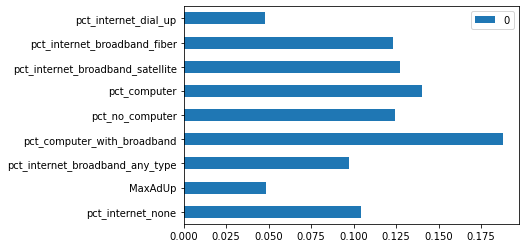

In [12]:
feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_variables)
feature_importances.plot.barh()

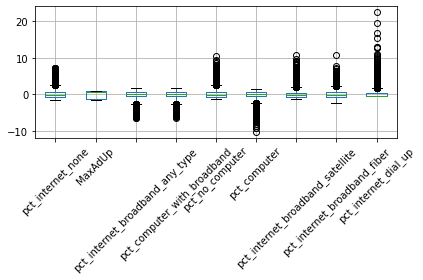

In [40]:
X_train_df = pd.DataFrame(X_train, columns = x_variables)
X_train_df.boxplot()
plt.xticks(rotation = 45)
plt.tight_layout()

In [39]:
X_train.shape

(52535, 9)

In [46]:
#remove outliers
threshold = 500
X_train_df = pd.DataFrame(X_train, columns = x_variables, index = y_train.index)
X_train_copy = X_train_df.copy()
X_train_copy = X_train_copy.sort_values('pct_internet_none').iloc[:-500,:]
X_train_copy = X_train_copy.sort_values('pct_internet_broadband_any_type').iloc[500:,:]
X_train_copy = X_train_copy.sort_values('pct_computer_with_broadband').iloc[500:,:]
X_train_copy = X_train_copy.sort_values('pct_no_computer').iloc[:-500,:]
X_train_copy = X_train_copy.sort_values('pct_computer').iloc[:-500,:]
X_train_copy = X_train_copy.sort_values('pct_internet_broadband_satellite').iloc[:-500,:]
X_train_copy = X_train_copy.sort_values('pct_internet_broadband_fiber').iloc[:-500,:]
X_train_copy = X_train_copy.sort_values('pct_internet_dial_up').iloc[:-500,:]
print(len(X_train_copy.index))
print(len(X_train_df.index))

48535
52535


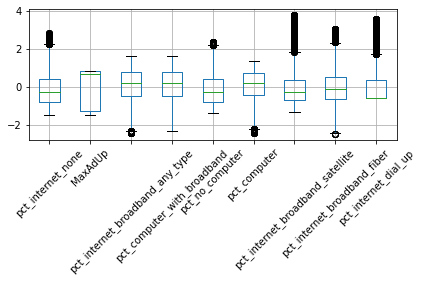

In [47]:
X_train_copy.boxplot()
plt.xticks(rotation = 45)
plt.tight_layout()

In [48]:
X_train_copy

,pct_internet_none,MaxAdUp,pct_internet_broadband_any_type,pct_computer_with_broadband,pct_no_computer,pct_computer,pct_internet_broadband_satellite,pct_internet_broadband_fiber,pct_internet_dial_up
tract_geoid,,,,,,,,,
48215022800,1.069225,0.821167,-0.653586,-0.682877,0.287228,-0.287228,1.654080,-2.476198,-0.586977
36047058400,0.223321,0.544312,0.059360,0.069626,0.407132,-0.407132,-0.718313,0.083968,-0.586977
18089042901,-0.834925,0.821167,0.943968,0.882387,-0.541416,0.541416,0.083817,0.083735,-0.586977
37183053107,-0.564903,0.682739,0.309200,0.364714,-0.407500,0.407500,-0.569182,0.083457,-0.586977
31033954900,0.362492,0.821167,-0.292930,-0.221661,0.297973,-0.297973,0.098452,0.083430,-0.586977
...,...,...,...,...,...,...,...,...,...
26111291602,0.641699,-1.405208,-0.767014,-0.683340,0.991787,-0.991787,-0.694814,0.311274,3.563523
39095009300,-0.012174,-1.405208,-0.064714,0.000583,-0.513047,0.513047,0.335494,0.422639,3.566586
4025001401,1.660877,-1.370602,-1.580336,-1.475381,0.667417,-0.667417,3.249652,-1.290607,3.569988


In [50]:
y_train_copy = y_train.loc[X_train_copy.index]

In [51]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
print('Parameters currently in use:\n')
pprint(regressor.get_params())
regressor.fit(X_train_copy, y_train_copy)
y_pred = regressor.predict(X_test)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 6.220494365768235
Mean Squared Error: 68.42984035929648
Root Mean Squared Error: 8.272233093868698


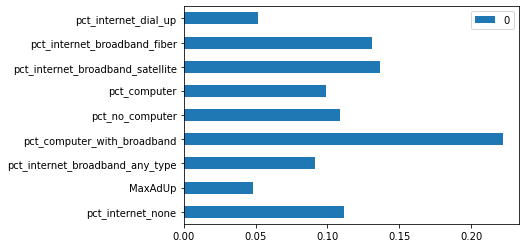

In [53]:
feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_variables)
feature_importances.plot.barh()

In [80]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [81]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and us

e all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\users\sarahwang\appdata\local\conda\conda\envs\pcresearch\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [83]:
y_pred = rf_random.predict(X_test)

In [84]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.950739442231869
Mean Squared Error: 64.17261282289702
Root Mean Squared Error: 8.010781037008627


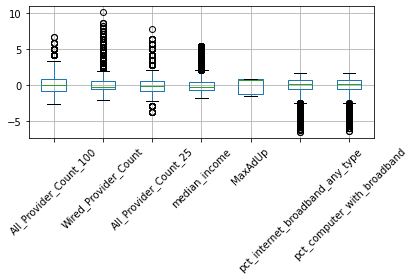

0    1.00001
1    1.00001
2    1.00001
3    1.00001
4    1.00001
5    1.00001
6    1.00001
dtype: float64